# Predicting NBA Shots

### Učitavanje podataka

In [27]:
import pandas as pd
file_path = 'shot_logs.csv'
data = pd.read_csv(file_path)

### Priprema podataka

In [28]:
data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [29]:
data.columns.values

array(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN',
       'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id'], dtype=object)

In [30]:
data.dtypes

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [31]:
data['LOCATION'] = data['LOCATION'].map({'H': 1, 'A': 0})
data['W'] = data['W'].map({'W': 1, 'L': 0})
data['SHOT_RESULT'] = data['SHOT_RESULT'].map({'made': 1, 'missed': 0})

Vrijednosti LOCATION iz stringa 'H' ili 'A' promjenjene u int 1 ili 0. Vrijednosti W iz stringa 'W' ili 'L' promjenjene u int 1 ili 0. Vrijednosti SHOT_RESULT iz stringa 'made' ili 'missed' promjenjene u int 1 ili 0.

In [32]:
def convert_clock_to_seconds(clock):
    minutes, seconds = map(int, clock.split(':'))
    return minutes * 60 + seconds

data['GAME_CLOCK'] = data['GAME_CLOCK'].apply(convert_clock_to_seconds)

Vrijednosti GAME_CLOCK iz stringa u formatu MM:SS promjenjene u sekunde (int).

In [33]:
data.dtypes

GAME_ID                         int64
MATCHUP                        object
LOCATION                        int64
W                               int64
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                      int64
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                     int64
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [34]:
data.nunique()

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

Kandidati za monotoni atribut su GAME_ID i MATCHUP jer svaka utakmica ima jedinstvenu vrijednost. Za sada ću ih izbaciti iz skupa podataka.

In [35]:
data.drop(('GAME_ID'), axis=1, inplace=True)
data.drop(('MATCHUP'), axis=1, inplace=True)

In [36]:
data.isna().sum()

LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

Nedostajuće vrijednosti značajke SHOT_CLOCK ću nadopuniti srednjom vrijednošću.

In [37]:
data.loc[data.SHOT_CLOCK.isna(),'SHOT_CLOCK'] = data.loc[:,'SHOT_CLOCK'].mean()
data.isna().sum()

LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
player_id                     0
dtype: int64

In [38]:
data.describe()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.499215,0.504377,0.208723,6.506899,2.469427,351.393811,12.453344,2.023355,2.765901,13.571504,2.264670,0.452139,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,0.500001,0.499983,13.233267,4.713260,1.139919,207.590603,5.636611,3.477760,3.043682,8.888964,0.441159,0.497706,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,0.000000,0.000000,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,0.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,0.000000,0.000000,-8.000000,3.000000,1.000000,172.000000,8.400000,0.000000,0.900000,4.700000,2.000000,0.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,0.000000,1.000000,1.000000,5.000000,2.000000,352.000000,12.453344,1.000000,1.600000,13.700000,2.000000,0.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,1.000000,1.000000,9.000000,9.000000,3.000000,531.000000,16.400000,2.000000,3.700000,22.500000,3.000000,1.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,1.000000,1.000000,53.000000,38.000000,7.000000,720.000000,24.000000,32.000000,24.900000,47.200000,3.000000,1.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [39]:
print('Touch time < 0: ', (data.TOUCH_TIME < 0.00).sum())

Touch time < 0:  312


Stršeće vrijednosti značajke TOUCH_TIME ću nadopuniti srednjom vrijednošću.

In [40]:
data.loc[data.TOUCH_TIME < 0.00,'TOUCH_TIME'] = data.loc[:,'TOUCH_TIME'].mean()
data.describe()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.499215,0.504377,0.208723,6.506899,2.469427,351.393811,12.453344,2.023355,2.778696,13.571504,2.264670,0.452139,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,0.500001,0.499983,13.233267,4.713260,1.139919,207.590603,5.636611,3.477760,2.983555,8.888964,0.441159,0.497706,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,0.000000,0.000000,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,0.000000,0.000000,-8.000000,3.000000,1.000000,172.000000,8.400000,0.000000,0.900000,4.700000,2.000000,0.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,0.000000,1.000000,1.000000,5.000000,2.000000,352.000000,12.453344,1.000000,1.600000,13.700000,2.000000,0.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,1.000000,1.000000,9.000000,9.000000,3.000000,531.000000,16.400000,2.000000,3.700000,22.500000,3.000000,1.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,1.000000,1.000000,53.000000,38.000000,7.000000,720.000000,24.000000,32.000000,24.900000,47.200000,3.000000,1.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


### Vizualizacija podataka

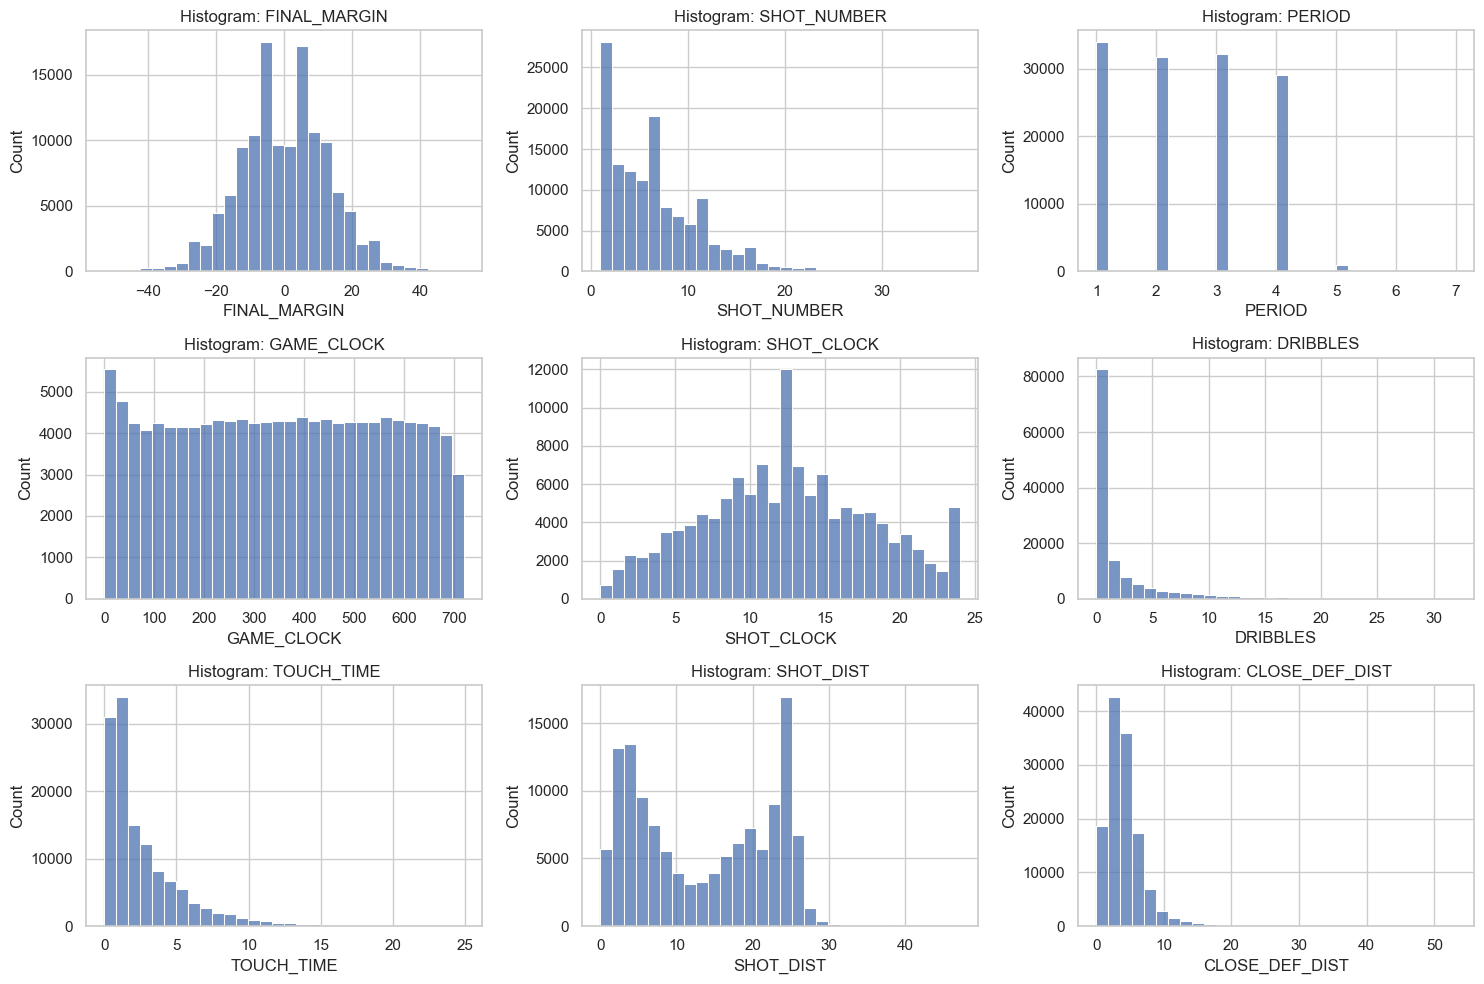

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

features_to_plot = ['FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']
for feature in features_to_plot:
    plt.subplot(3, 3, features_to_plot.index(feature) + 1)
    sns.histplot(data[feature], bins=30)
    plt.title(f'Histogram: {feature}')

plt.tight_layout()
plt.show()


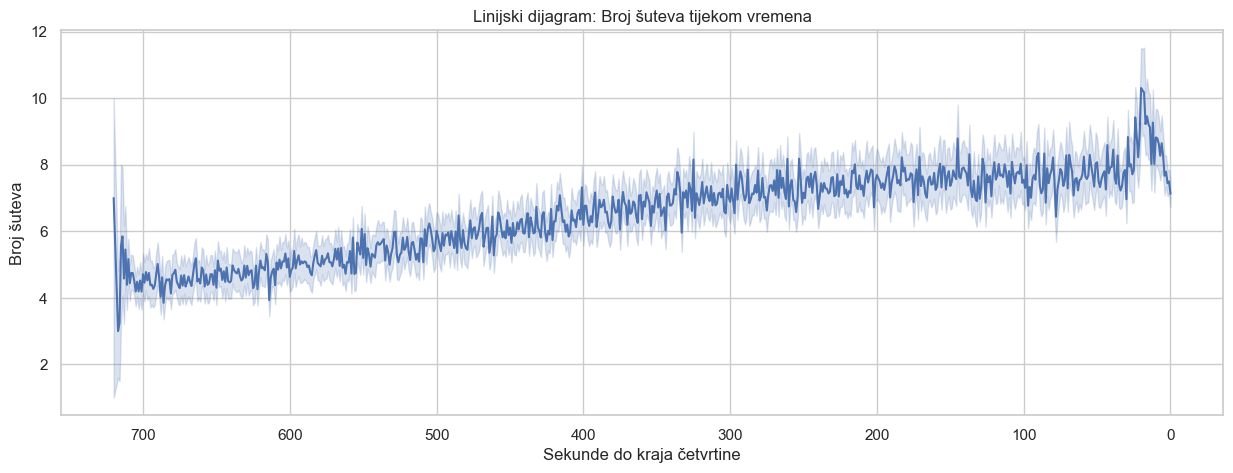

In [42]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='GAME_CLOCK', y='SHOT_NUMBER', data=data).invert_xaxis()
plt.title('Linijski dijagram: Broj šuteva tijekom vremena')
plt.xlabel('Sekunde do kraja četvrtine')
plt.ylabel('Broj šuteva')
plt.show()

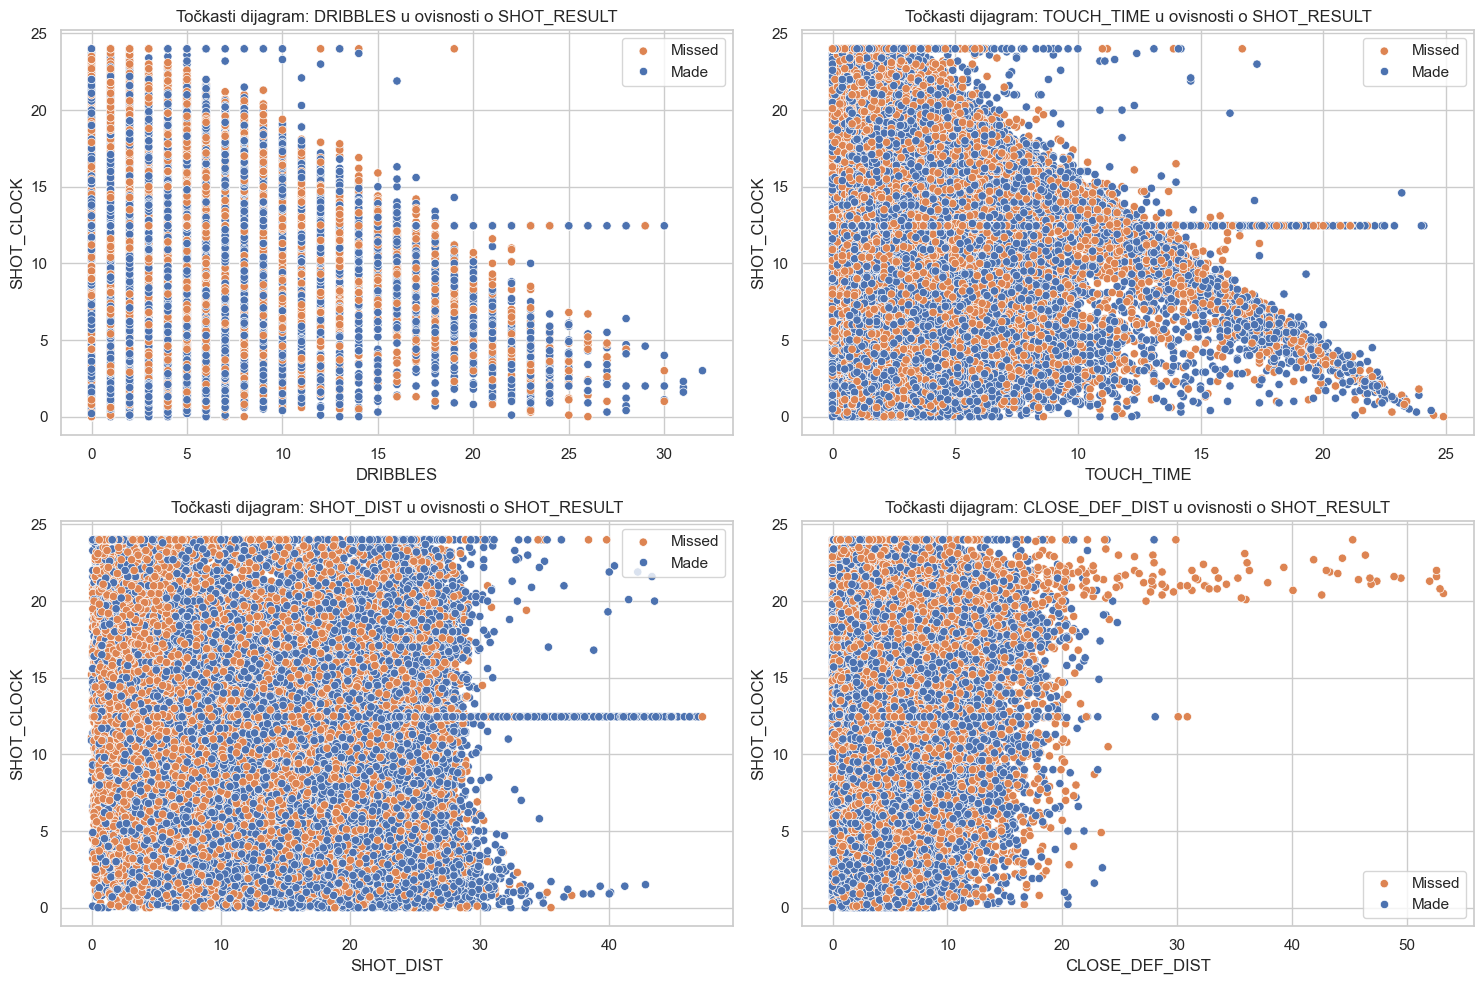

In [43]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(['DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=feature, y='SHOT_CLOCK', hue='SHOT_RESULT', data=data)
    plt.title(f'Točkasti dijagram: {feature} u ovisnosti o SHOT_RESULT')
    plt.legend(['Missed', 'Made'])

plt.tight_layout()
plt.show()


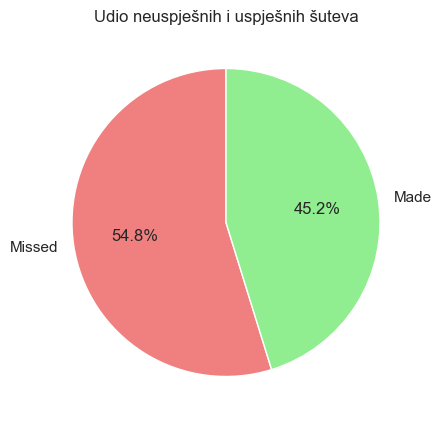

In [44]:
shot_result_counts = data['SHOT_RESULT'].value_counts()
labels = ['Missed', 'Made']
sizes = shot_result_counts.values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Udio neuspješnih i uspješnih šuteva')
plt.show()

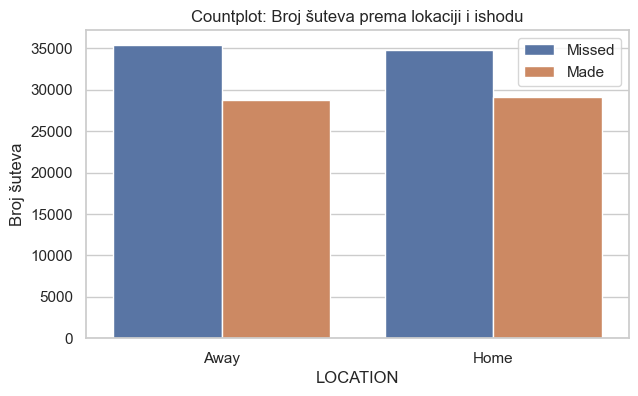

In [45]:
plt.figure(figsize=(7, 4))
sns.countplot(x='LOCATION', data=data, hue='SHOT_RESULT')
plt.title('Countplot: Broj šuteva prema lokaciji i ishodu')
plt.xlabel('LOCATION')
plt.ylabel('Broj šuteva')
plt.xticks([0, 1], ['Away', 'Home'])
plt.legend(['Missed', 'Made'])
plt.show()

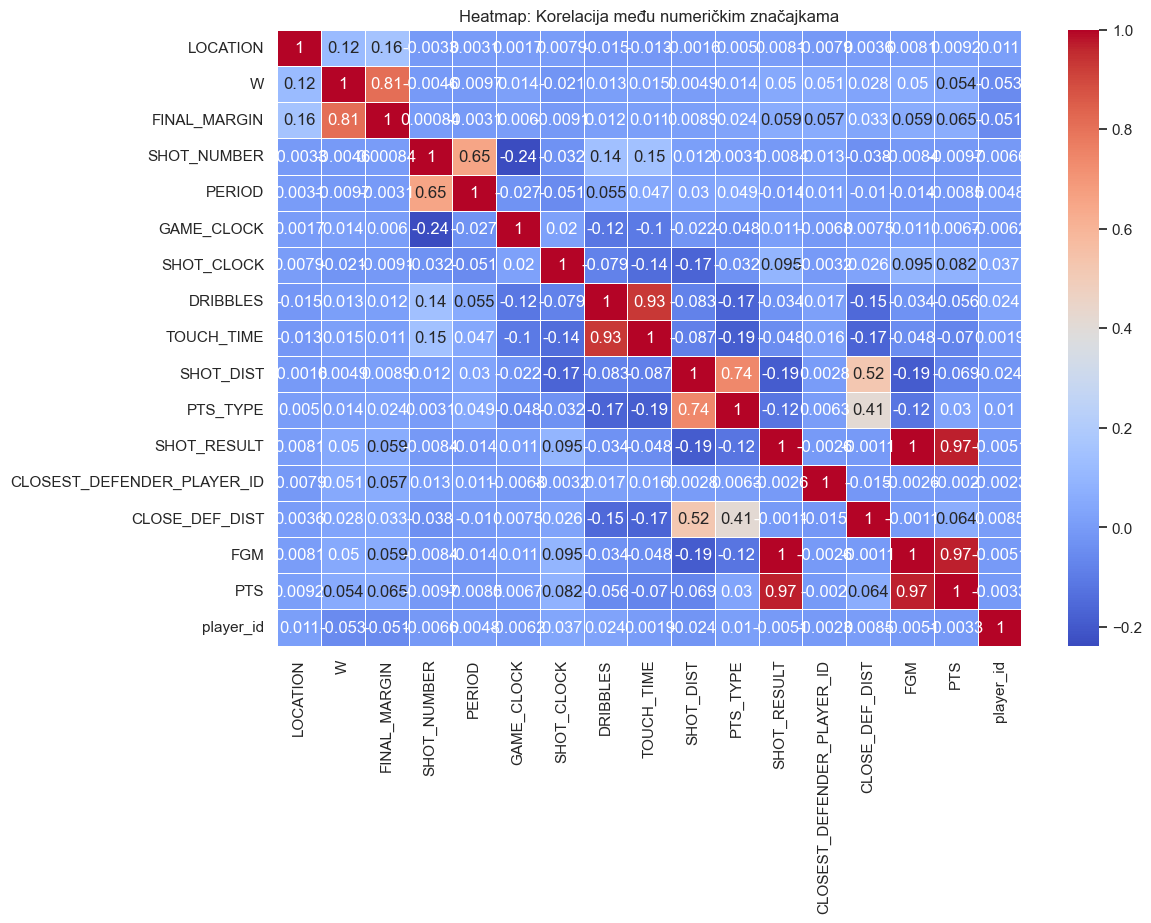

In [46]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap: Korelacija među numeričkim značajkama')
plt.show()
